# IAU 1.fáza 
### Patrik Pišta (50%), Khrystyna Bindiuk (50%)                                                                        
### Dátum: 29.10.2023

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statsmodels.api as sm
import scipy.stats as stats
import statsmodels.stats.api as sms

#  Dataset product

## Načítanie dát

In [2]:
filename = "data/product.csv"
products = pd.read_csv(filename, sep='\t')
products.head()

store_name code    product_ean             location
0       Wesseling   DE  5727688778933        Europe/Berlin
1          Maasin   PH  7792555455079          Asia/Manila
2      Mexborough   GB  6118743003999        Europe/London
3          Exeter   GB  9657499361696        Europe/London
4  Ambatondrazaka   MG  2821295500598  Indian/Antananarivo

## Opis dát a charakteristiky

V datasete je 14925 záznamov o produktoch a obchodoch v ktorých tieto produkty sú.

Počet jednotlivých atribútov v datasete : 4

Atribúty v datasete:
* store_name -  názov obchodu
* code - kód krajiny
* product_ean - číslo produktu
* location - lokácia obchodu

In [3]:
len(products)

14925

In [4]:
len(products.columns)

4

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14925 entries, 0 to 14924
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   store_name   14925 non-null  object
 1   code         14909 non-null  object
 2   product_ean  14925 non-null  int64 
 3   location     14925 non-null  object
dtypes: int64(1), object(3)
memory usage: 466.5+ KB


## Problémy s dátami

Ošetrenie duplikátov

In [6]:
duplicates = products[products.duplicated()]
products = products.drop_duplicates()
print("Počet zaznamov v datasete " +str(len(products)))
print("V datasete je " + str(len(duplicates)) + " duplikatov.")

Počet zaznamov v datasete 14925
V datasete je 0 duplikatov.


V stlpci Code je 'nan', po vyprintovani casti kde je code 'nan' je to len jedna lokacia Africa/Windhoek, čo je v namíbii, takže to môžme nahradiť kódom NA

In [7]:
products.code.unique()

array(['DE', 'PH', 'GB', 'MG', 'TR', 'US', 'CN', 'MY', 'FR', 'BR', 'IN',
       'RU', 'JP', 'TW', 'SO', 'DZ', 'ME', 'IR', 'AR', 'CO', 'ES', 'ID',
       'HT', 'RE', 'TZ', 'IT', 'BE', 'MX', 'CZ', 'ET', 'BW', 'MA', 'AD',
       'AT', 'FI', 'CA', 'UA', 'DJ', 'EG', 'NL', 'PG', 'KR', 'BG', 'AU',
       'PK', 'ZA', 'YE', 'NE', 'TN', 'MW', 'SL', 'XK', 'EC', 'HN', 'GM',
       'LT', 'AM', 'SY', 'LK', 'PT', 'IL', 'CL', 'CI', 'VE', 'PL', 'KG',
       'BY', 'CD', 'NG', 'CF', 'UZ', 'CM', 'SE', 'VN', 'MK', 'MM', 'TH',
       'BD', 'KZ', 'CU', 'LR', 'VU', 'GA', 'SV', 'BO', 'HK', 'PE', 'GH',
       'CR', 'PR', 'BJ', 'AO', 'IE', 'UG', 'CH', 'AF', 'DK', 'SD', 'KE',
       'SK', 'NI', 'TT', 'PA', 'GE', 'IQ', nan, 'RS', 'JM', 'NZ', 'GN',
       'PS', 'UY', 'NO', 'MN', 'BA', 'RO', 'TL', 'MQ', 'AZ', 'ML', 'TJ',
       'SA', 'EE', 'GT', 'DO', 'LY', 'MZ', 'KH', 'MT', 'TD', 'CG', 'MD',
       'RW', 'HR'], dtype=object)

In [8]:
products[products['code'].isna()].location.unique()

array(['Africa/Windhoek'], dtype=object)

In [9]:
products['code'] = products['code'].fillna('NA')
products[products['code'].isna()].location.unique()

array([], dtype=object)

# Dataset Session

## Načítanie dát

In [10]:
filename2 = "data/session.csv"
sessions = pd.read_csv(filename2, sep='\t')
sessions.head()

session_duration  wild_mouse_duration  pct_scroll_move screen_width  \
0         236.88961             10.28554         36.92911          800   
1         179.46887              8.98334         33.83344         1366   
2         196.84071              9.47269         40.03141         1280   
3         217.18923             11.65075         60.43237         1280   
4         116.79281              8.46519         67.11029         1024   

     product_ean  pct_doubleclick browser_name  user_id  pct_mouse_click  \
0  2193503010008         10.53409       chrome      599          9.97809   
1  4929043671489         11.15279         edge      122          9.40106   
2  2067448433744          8.25461      firefox     2125         10.38927   
3  3783288205219          9.77124       chrome     1004          9.83475   
4  3142410160312         10.12802         edge     1481         11.76333   

   pct_mouse_move  ...        session_start  session_id  screen_height  \
0        12.85887  ...  2022-06-24 21:55:59      677722            600   
1         9.93977  ...  2022-06-28 17:14:01      479845            800   
2        11.58422  ...  2021-11-20 14:18:53      928245            800   
3        12.80934  ...  2023-05-24 17:04:14     1021136           1024   
4        12.42584  ...  2019-04-03 19:31:56      797259            768   

   pct_input  pct_scrandom pct_rage_click  ack pct_scroll_move_duration  \
0    2.74293      26.14710       37.19953  1.0                  5.89457   
1    0.73180      46.96177       43.10016  0.0                  8.59232   
2    1.24545      43.17029       63.05060  1.0                  6.55668   
3   10.81056      53.95914       32.19738  0.0                  7.23594   
4    0.46350      49.41581       15.73448  0.0                  8.35696   

   pct_click  total_load_time  
0    5.00618          4.86191  
1   11.57778          6.40590  
2    3.61231          6.31409  
3    4.16841          1.57854  
4    7.89278          5.10701  

[5 rows x 25 columns]

## Opis dát a charakteristiky

V datasete je 11056 záznamov o jednotlivých sedeniach zákazníkov.

Počet jednotlivých atribútov v datasete : 25

Atribúty v datasete:
* session_duration - dĺžka sedenia
* wild_mouse_duration - trvanie rýchleho pohybu myši
* pct_scroll_move - záznamy o rolovaní
* screen_width - šírka obrazovky
* product_ean - číslo produktu
* pct_doubleclick - záznamy o dvojitom kliknutí používateľa
* browser_name - názov prehliadača
* user_id - id používateľa
* pct_mouse_click - záznamy o klikaní používateľa myšou
* pct_mouse_move - záznamy o pohybe myši
* pct_wild_mouse - záznamy o rýchlom pohybe myši
* pct_click_product_info - záznamy o klikaní na informácie produktu
*  mouse_move_total_rel_distance - celková vzdialenosť dosiahnutá pohybom myši
* scroll_move_total_rel_distance - celková vzdialenosť dosiahnutá rolovaním 
* page_activity_duration - čas strávený na jednej stránke
* session_start - začiatok sedenia
* session_id - id sedenia
* screen_height - výška obrazovky
* pct_input - záznamy o zadávaní vstupov používateľom
* pct_scrandom - záznamy o rýchlom presúvaní na stránke
* pct_rage_click - záznamy o zúrivom kliknutí na stránke
* ack - nákup zákazníka
* pct_scroll_move_duration - normonovaná hodnota na celkový čas rolovania
* pct_click - záznamy o klikaní používateľa
* total_load_time - celkový čas načítavania

In [11]:
sessions.describe()

session_duration  wild_mouse_duration  pct_scroll_move   product_ean  \
count      11056.000000         11045.000000     11044.000000  1.105600e+04   
mean         151.265740             9.789469        48.704947  4.985206e+12   
std           60.034700             0.984515        12.797387  2.914257e+12   
min          -68.356750             6.382620         0.000000  5.141760e+07   
25%          111.358155             9.124430        40.150343  2.378999e+12   
50%          150.418510             9.777010        48.567095  5.024825e+12   
75%          191.829868            10.451130        57.313102  7.536608e+12   
max          380.352810            13.872120       100.000000  9.996525e+12   

       pct_doubleclick       user_id  pct_mouse_click  pct_mouse_move  \
count     11045.000000  11056.000000     11043.000000    11045.000000   
mean         10.704692   1250.041606         9.782817       11.480193   
std           1.989404    726.092591         0.993017        1.267582   
min           3.033820      0.000000         6.321670        5.786290   
25%           9.531260    610.000000         9.117960       10.671230   
50%          11.004160   1261.000000         9.782200       11.480920   
75%          12.102000   1879.000000        10.445040       12.298310   
max          16.495640   2499.000000        13.752930       16.993550   

       pct_wild_mouse  pct_click_product_info  ...  \
count    11044.000000            11045.000000  ...   
mean        48.781600               50.826365  ...   
std         12.649957               13.439798  ...   
min          0.000000                0.000000  ...   
25%         40.479845               41.580860  ...   
50%         48.682945               50.918040  ...   
75%         57.217623               59.985460  ...   
max        100.000000              100.000000  ...   

       scroll_move_total_rel_distance  page_activity_duration    session_id  \
count                    11045.000000            11045.000000  1.105600e+04   
mean                         8.107525                9.799071  7.410726e+05   
std                          1.357931                2.100532  4.316535e+05   
min                          2.946530                3.249020  1.028000e+03   
25%                          7.192030                8.120790  3.661730e+05   
50%                          8.114080                9.832000  7.409380e+05   
75%                          9.023410               11.492340  1.110756e+06   
max                         13.005680               16.775090  1.499995e+06   

          pct_input  pct_scrandom  pct_rage_click           ack  \
count  11045.000000  11045.000000    11045.000000  11056.000000   
mean       2.741457     45.150497       46.039472      0.547033   
std        3.609760     12.862476       12.335309      0.497805   
min        0.000000      0.000000        0.000000      0.000000   
25%        0.857680     36.310970       37.940730      0.000000   
50%        1.647470     44.937080       46.028870      1.000000   
75%        3.253700     53.666370       54.279400      1.000000   
max      100.000000    100.000000      100.000000      1.000000   

       pct_scroll_move_duration     pct_click  total_load_time  
count              11045.000000  11045.000000     11056.000000  
mean                   9.817508      9.528577         3.973645  
std                    2.214587      2.418114         2.787884  
min                    3.258890      0.000000         0.016440  
25%                    8.056040      7.649230         1.914967  
50%                    9.445040     10.344390         3.358435  
75%                   11.484610     11.415770         5.359550  
max                   17.165130     15.448980        24.872660  

[8 rows x 21 columns]

In [12]:
len(sessions)

11056

In [13]:
len(sessions.columns)

25

In [14]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11056 entries, 0 to 11055
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   session_duration                11056 non-null  float64
 1   wild_mouse_duration             11045 non-null  float64
 2   pct_scroll_move                 11044 non-null  float64
 3   screen_width                    11056 non-null  object 
 4   product_ean                     11056 non-null  int64  
 5   pct_doubleclick                 11045 non-null  float64
 6   browser_name                    11056 non-null  object 
 7   user_id                         11056 non-null  int64  
 8   pct_mouse_click                 11043 non-null  float64
 9   pct_mouse_move                  11045 non-null  float64
 10  pct_wild_mouse                  11044 non-null  float64
 11  pct_click_product_info          11045 non-null  float64
 12  mouse_move_total_rel_distance   

## Problémy s dátami

### Ošetrenie duplikátov

In [15]:
duplicates = sessions[sessions.duplicated()]
sessions = sessions.drop_duplicates()
print("Počet zaznamov v datasete " +str(len(sessions)))
print("V datasete je " + str(len(duplicates)) + " duplikatov.")

Počet zaznamov v datasete 10925
V datasete je 131 duplikatov.


# Dataset users

In [16]:
filename3="data/user.csv"
users = pd.read_csv(filename3, sep='\t')
users.head()

residence          registration  \
0                                                NaN  09/20/2014, 00:00:00   
1                                                NaN            2019-11-05   
2                                                NaN            2015-06-24   
3                        滋賀県三鷹市丸の内1丁目21番5号 台場アーバン622           21 May 2019   
4  Lagoa Rodrigues, 206\r\nHorto\r\n91399325 Lima...            2014/05/22   

   user_id                             mail  sex             username  \
0      593              ianalves@bol.com.br    M          almeidaluna   
1     1430       franciscorezende@ig.com.br    F  maria-juliasilveira   
2     1557          wieklisa@googlemail.com  NaN               timo30   
3     1890              kyosuke54@yahoo.com  NaN           yoichisato   
4     1487  maria-ceciliaalmeida@uol.com.br    F      caldeiralavinia   

    birthdate               name                  job   race  \
0         NaN  Sr. Diego da Cruz                  NaN    NaN   
1         NaN       Isabel Ramos               Jóquei  black   
2         NaN   Siegbert Benthin  Chirurgiemechaniker    NaN   
3  1990-08-13              阿部 明美                 アイドル    NaN   
4         NaN      Larissa Pires          Eletricista    NaN   

                                             address  
0  Via de Barros\r\nSanto Agostinho\r\n68921830 S...  
1  Passarela Joaquim Aragão, 58\r\nUniversitário\...  
2                     Wilmsenplatz 98\r\n61933 Riesa  
3                                富山県富里市鶴ヶ丘41丁目18番17号  
4  Praça de Nogueira, 33\r\nDom Silverio\r\n14934...

## Opis dát a charakteristiky

V datasete je 2575 záznamov o samotných používateľoch.

Počet jednotlivých atribútov v datasete : 11

Atribúty v datasete:
* residence - rezidencia používateľa
* registration - dátum registrácie používateľa
* user_id - id používateľa
* mail - email používateĺa
* sex - pohlavie používateľa
* username - používateľske meno 
* birthdate - dátum narodenia používateĺa
* name - meno a priezvisko používateľa
* job - zamestnanie používateľa
* race - rasa používateľa
* address - adresa používateľa

In [17]:
users.describe()

user_id
count  2575.000000
mean   1282.372427
std     735.119778
min       2.000000
25%     657.500000
50%    1291.000000
75%    1917.500000
max    2572.000000

In [18]:
len(users)

2575

In [19]:
len(users.columns)


11

In [20]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2575 entries, 0 to 2574
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   residence     901 non-null    object
 1   registration  2575 non-null   object
 2   user_id       2575 non-null   int64 
 3   mail          2575 non-null   object
 4   sex           1287 non-null   object
 5   username      2575 non-null   object
 6   birthdate     1416 non-null   object
 7   name          2575 non-null   object
 8   job           1030 non-null   object
 9   race          773 non-null    object
 10  address       2189 non-null   object
dtypes: int64(1), object(10)
memory usage: 221.4+ KB


## Problémy s dátami

### Ošetrenie duplikátov

In [21]:
duplicates = users[users.duplicated()]
users = users.drop_duplicates()
print("Počet zaznamov v datasete " +str(len(users)))
print("V datasete je " + str(len(duplicates)) + " duplikatov.")

Počet zaznamov v datasete 2575
V datasete je 0 duplikatov.


Dátumy boli tiež naformátované na jeden format.

In [22]:
src=users["registration"]
def datCnv(src):
    return pd.to_datetime(src)

users['formatted_registration'] = users['registration'].apply(datCnv)

Všetky hodnoty v stĺpci race "unspecified" a "NaN" boli tiež zmenené na "Unknown", aby bolo neskôr jednoduchšie analyzovať informácie na základe tohto parametra.

In [23]:
users["race"].fillna("Unknown", inplace=True)
users["race"] = users["race"].str.replace(r'(?i)unspecified', 'Unknown', regex=True)

User_id by malo byť pre každého používateľa unikátne, avšak ako môžme vidieť nižšie, na jedno user_id je v datasete viac používateľov

In [24]:
values = users['user_id'].value_counts()
print(values)

user_id
1883    6
1143    6
362     6
958     5
298     5
       ..
1806    1
26      1
1383    1
2240    1
1810    1
Name: count, Length: 1641, dtype: int64


In [25]:
users.head()

residence          registration  \
0                                                NaN  09/20/2014, 00:00:00   
1                                                NaN            2019-11-05   
2                                                NaN            2015-06-24   
3                        滋賀県三鷹市丸の内1丁目21番5号 台場アーバン622           21 May 2019   
4  Lagoa Rodrigues, 206\r\nHorto\r\n91399325 Lima...            2014/05/22   

   user_id                             mail  sex             username  \
0      593              ianalves@bol.com.br    M          almeidaluna   
1     1430       franciscorezende@ig.com.br    F  maria-juliasilveira   
2     1557          wieklisa@googlemail.com  NaN               timo30   
3     1890              kyosuke54@yahoo.com  NaN           yoichisato   
4     1487  maria-ceciliaalmeida@uol.com.br    F      caldeiralavinia   

    birthdate               name                  job     race  \
0         NaN  Sr. Diego da Cruz                  NaN  Unknown   
1         NaN       Isabel Ramos               Jóquei    black   
2         NaN   Siegbert Benthin  Chirurgiemechaniker  Unknown   
3  1990-08-13              阿部 明美                 アイドル  Unknown   
4         NaN      Larissa Pires          Eletricista  Unknown   

                                             address formatted_registration  
0  Via de Barros\r\nSanto Agostinho\r\n68921830 S...             2014-09-20  
1  Passarela Joaquim Aragão, 58\r\nUniversitário\...             2019-11-05  
2                     Wilmsenplatz 98\r\n61933 Riesa             2015-06-24  
3                                富山県富里市鶴ヶ丘41丁目18番17号             2019-05-21  
4  Praça de Nogueira, 33\r\nDom Silverio\r\n14934...             2014-05-22

# Významné atribúty

## Pohlavie

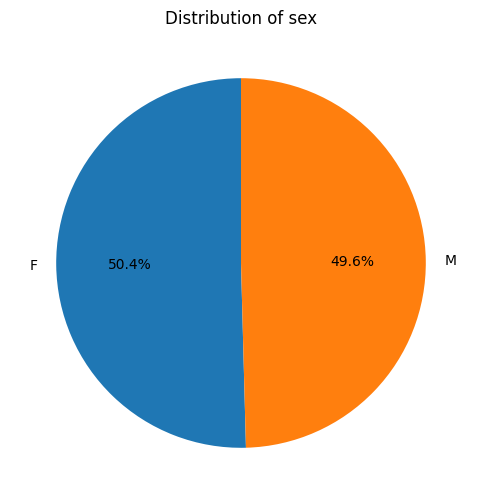

In [26]:
plt.figure(figsize=(8, 6))
plt.title(f'Distribution of sex')
users['sex'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

Rozdelenie pohlaví medzi používateľmi je veľmi rovnomerné, o niečo väčšiu časť však tvoria ženy.

## Rasa

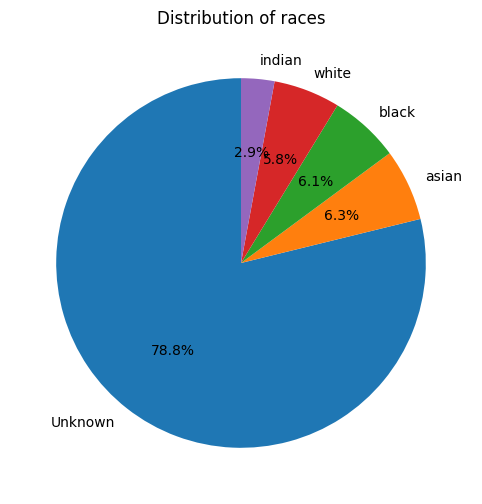

In [27]:
plt.figure(figsize=(8, 6))
plt.title(f'Distribution of races')
users['race'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

Na koláčovom grafe vidíme distribúciu rás, ale väčšinnu z datasetu zaberá 'Unknown', čo nám nič nehovorí, takže po jej odstránení by sme mali distribúciu vidieť lepšie.

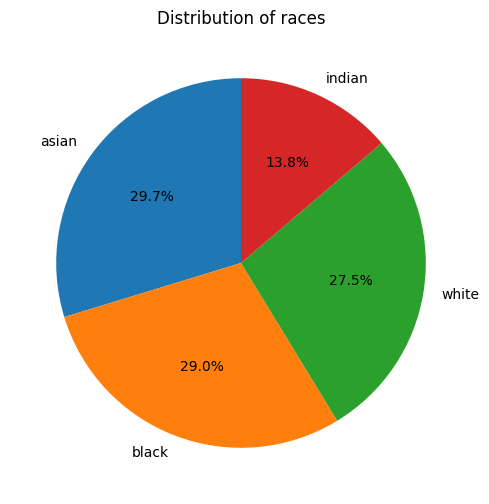

In [28]:
unknown_race_index = users[users['race'] == 'Unknown'].index
race_without_unknown = users.drop(unknown_race_index)
plt.figure(figsize=(8, 6))
plt.title(f'Distribution of races')
race_without_unknown['race'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

Na koláčovom grafe vidíme, že rasy sú pomerne rovnomerne rozložené, až na výnimku rasy 'indian', ktorá má len necelých 14%

## Rok narodenia

In [29]:
birthdate = pd.to_datetime(users['birthdate'])
users['year'] = birthdate.dt.strftime('%Y')
users.head()

residence          registration  \
0                                                NaN  09/20/2014, 00:00:00   
1                                                NaN            2019-11-05   
2                                                NaN            2015-06-24   
3                        滋賀県三鷹市丸の内1丁目21番5号 台場アーバン622           21 May 2019   
4  Lagoa Rodrigues, 206\r\nHorto\r\n91399325 Lima...            2014/05/22   

   user_id                             mail  sex             username  \
0      593              ianalves@bol.com.br    M          almeidaluna   
1     1430       franciscorezende@ig.com.br    F  maria-juliasilveira   
2     1557          wieklisa@googlemail.com  NaN               timo30   
3     1890              kyosuke54@yahoo.com  NaN           yoichisato   
4     1487  maria-ceciliaalmeida@uol.com.br    F      caldeiralavinia   

    birthdate               name                  job     race  \
0         NaN  Sr. Diego da Cruz                  NaN  Unknown   
1         NaN       Isabel Ramos               Jóquei    black   
2         NaN   Siegbert Benthin  Chirurgiemechaniker  Unknown   
3  1990-08-13              阿部 明美                 アイドル  Unknown   
4         NaN      Larissa Pires          Eletricista  Unknown   

                                             address formatted_registration  \
0  Via de Barros\r\nSanto Agostinho\r\n68921830 S...             2014-09-20   
1  Passarela Joaquim Aragão, 58\r\nUniversitário\...             2019-11-05   
2                     Wilmsenplatz 98\r\n61933 Riesa             2015-06-24   
3                                富山県富里市鶴ヶ丘41丁目18番17号             2019-05-21   
4  Praça de Nogueira, 33\r\nDom Silverio\r\n14934...             2014-05-22   

   year  
0   NaN  
1   NaN  
2   NaN  
3  1990  
4   NaN

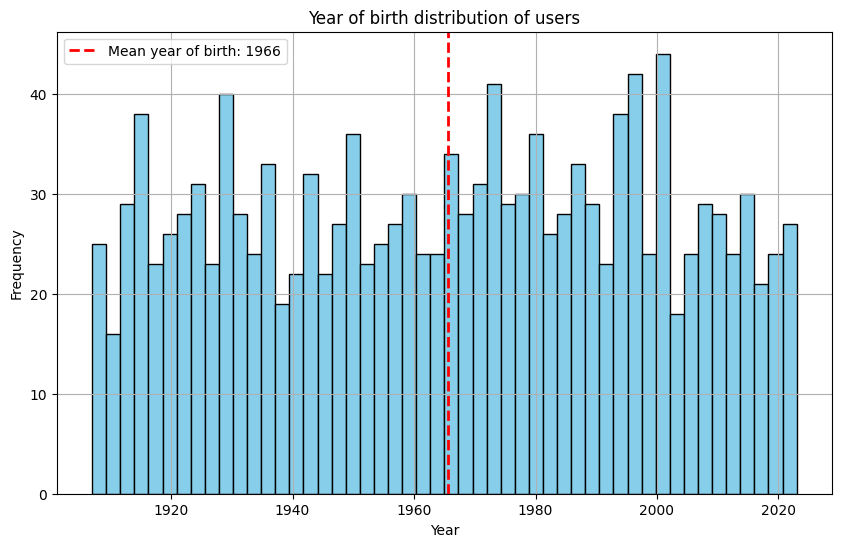

In [30]:
without_nan = users[users['year'].notna()]
without_nan = without_nan.astype({'year':'int'})
mean_yearofbirth = without_nan['year'].mean()
plt.figure(figsize=(10, 6))
plt.hist(without_nan['year'], bins=50, color='skyblue', edgecolor='black')
plt.title('Year of birth distribution of users')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.grid(True)
plt.axvline(mean_yearofbirth, color='red', linestyle='dashed', linewidth=2, label=f'Mean year of birth: {mean_yearofbirth:.0f}')
plt.legend()
plt.show()

Z dátumu narodenia zoberieme iba rok a zpriemerujeme, zistili sme, že priemerný rok narodenia používateľov je 1966. Podľa grafu vidíme, že niektoré účty nedávajú zmysel, keďže majú dátum narodenia
aj po roku 2020 a naopak niektoré účty aj pred rokom 1920.

## ACK

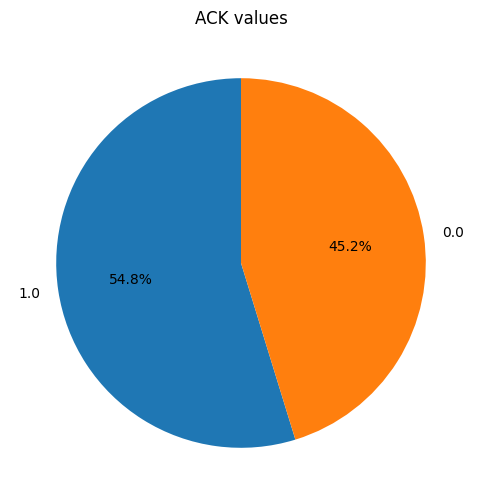

In [31]:
plt.figure(figsize=(8, 6))
plt.title(f'ACK values')
sessions['ack'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

'ack' hodnota nám hovorí o tom, či používateľ v danom sedení položku zakúpil alebo nie. Môžeme vidieť, že väčšia polovica položku počas sedenia zakúpi.

## Lokácia

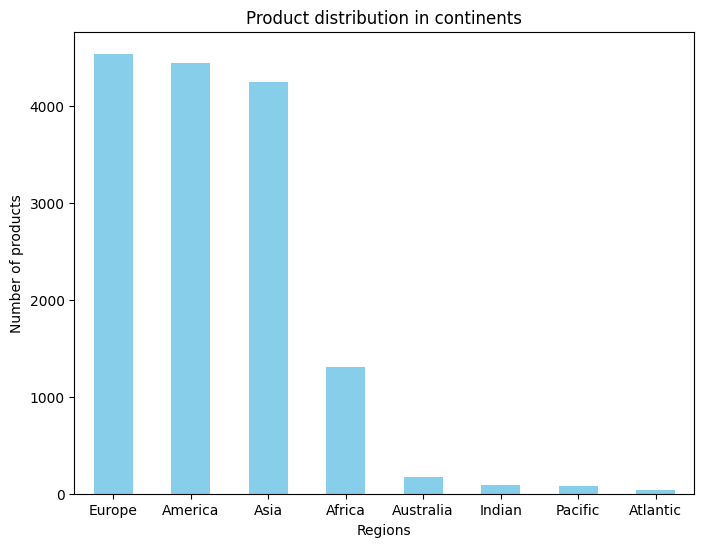

In [32]:
products['region'] = products['location'].apply(lambda x: x.split('/')[0])
products['region'].value_counts().plot(kind='bar', figsize=(8, 6), color='skyblue')
plt.title('Product distribution in continents')
plt.xlabel('Regions')
plt.ylabel('Number of products')
plt.xticks(rotation=0)
plt.show()

Graf zobrazuje distribúciu produktov podľa regiónov, najviac je v Európe, naopak najmenej v Atlantiku.

## Registrácie

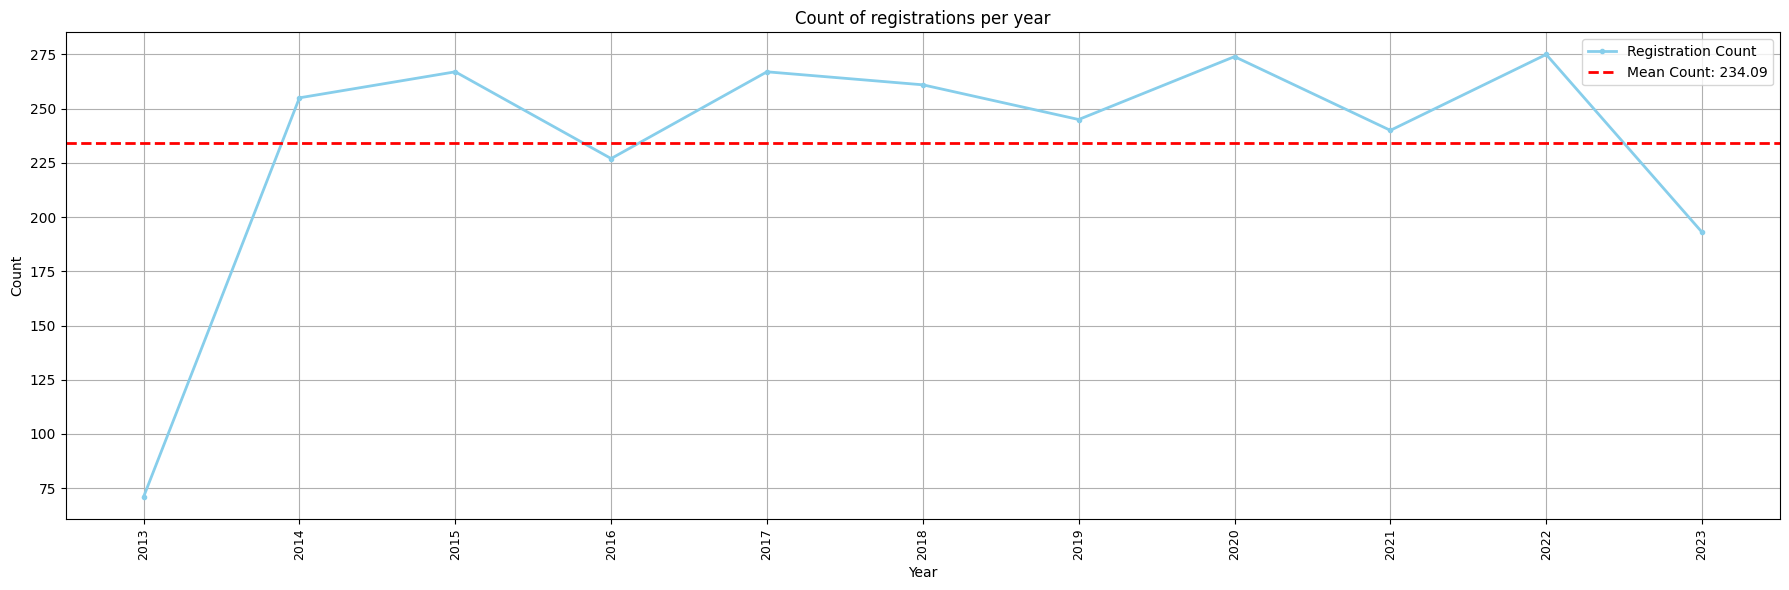

In [33]:
registration_date = pd.to_datetime(users['formatted_registration'])
users['registration_year'] = registration_date.dt.strftime('%Y')

group = users.groupby('registration_year').size().reset_index(name='count')
mean_count = group['count'].mean()

plt.figure(figsize=(18, 6))
plt.plot(group['registration_year'], group['count'], marker='o', color='skyblue', linewidth=2, markersize=3, label='Registration Count')
plt.title('Count of registrations per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=90, fontsize=9)
plt.grid(True)

plt.axhline(mean_count, color='red', linestyle='dashed', linewidth=2, label=f'Mean Count: {mean_count:.2f}')

plt.legend()

plt.tight_layout()
plt.show()

Z grafu vieme vyčítať, že registrácie sa začali v roku 2013, a priemerný počet registrácií je 234 na rok. Tiež môžme vidieť že v roku 2023 počet registrácií upadá.

## Dĺžka sedenia

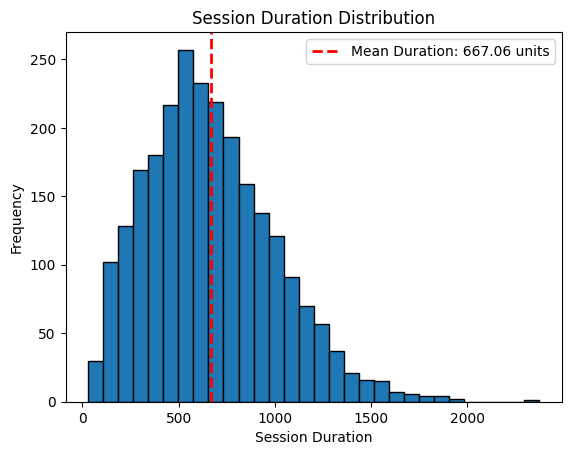

In [34]:
group = sessions.groupby('user_id')['session_duration'].sum()
mean = group.mean()
plt.hist(group, bins=30, edgecolor='black')
plt.xlabel('Session Duration')
plt.ylabel('Frequency')
plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label=f'Mean Duration: {mean:.2f} units')
plt.title('Session Duration Distribution')
plt.legend()
plt.show()

Tento graf nám znázorňuje, koľko času strávili používatelia vo všetkých sedeniach dokopy. Priemerný čas je 667 jednotiek ( nemáme určené v akých jednotkách je daný atribút ).

## Začiatok sedenia

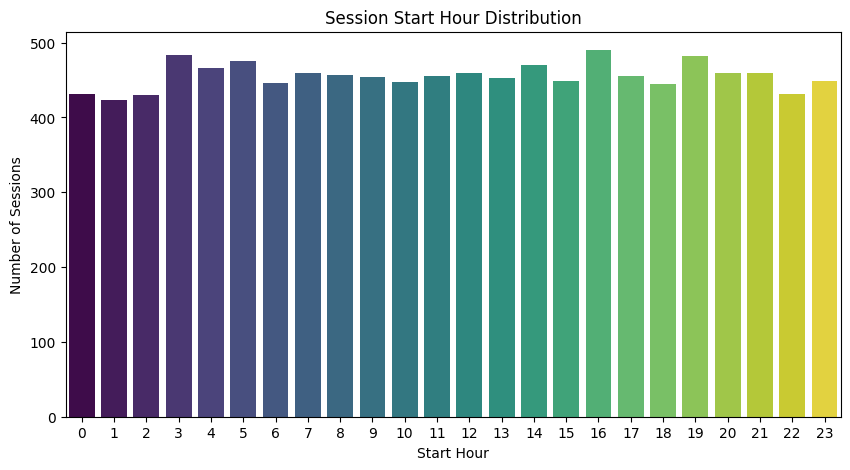

In [35]:
start = pd.to_datetime(sessions['session_start'])
sessions['start_hour'] = start.dt.hour

plt.figure(figsize=(10, 5))
sns.countplot(x='start_hour', data=sessions, hue='start_hour', palette='viridis', legend=False)

plt.title('Session Start Hour Distribution')
plt.xlabel('Start Hour')
plt.ylabel('Number of Sessions')

plt.show()

Z atribútu session_start si zoberieme čisto iba hodiny, kedy dané sedennie začalo. Z toho vytvoríme graf a na ňom môžme vidieť, že sedenia sú pomerne rovnomerne rozložené s tým, že na každú hodinu máme vyše 400 záznamov.
Nevieme povedať, že by používatelia preferovali určitý čas.

## Zúrivé kliknutia

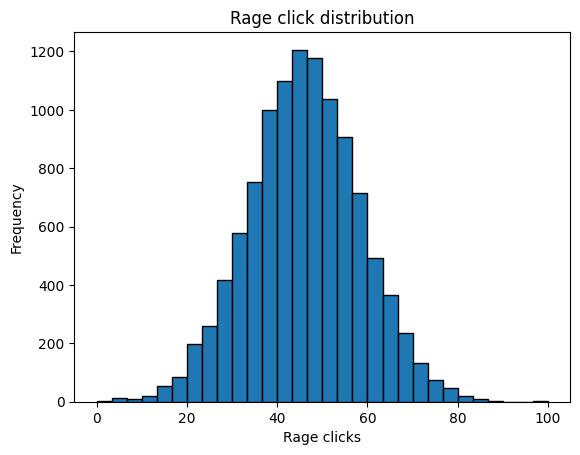

In [36]:
plt.hist(sessions['pct_rage_click'], bins=30, edgecolor='black')
plt.xlabel('Rage clicks')
plt.ylabel('Frequency')
plt.title('Rage click distribution')
plt.show()

Graf znázorňujúci hodnoty zúrivých kliknutí. Vidíme, že v datasete sa najviac vyskytujú zúrivé kliknutia s hodnotami okolo 50.

## Internetový prehliadač

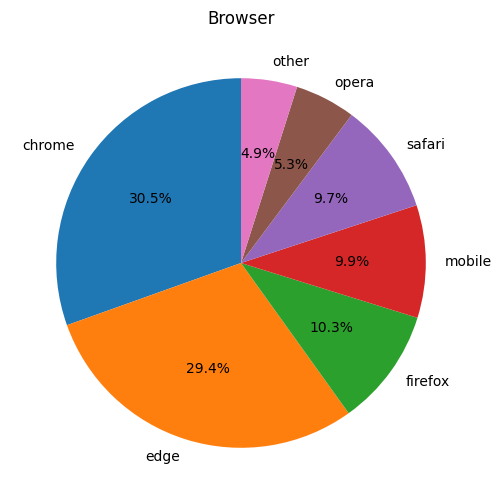

In [37]:
plt.figure(figsize=(8, 6))
plt.title(f'Browser')
sessions['browser_name'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
plt.ylabel('')
plt.show()

Zostrojili sme graf distribúcií internetových prehliadačov. Z grafu vidíme, že väčšina používateľov používa chrome alebo edge.

# Párová analýza dát

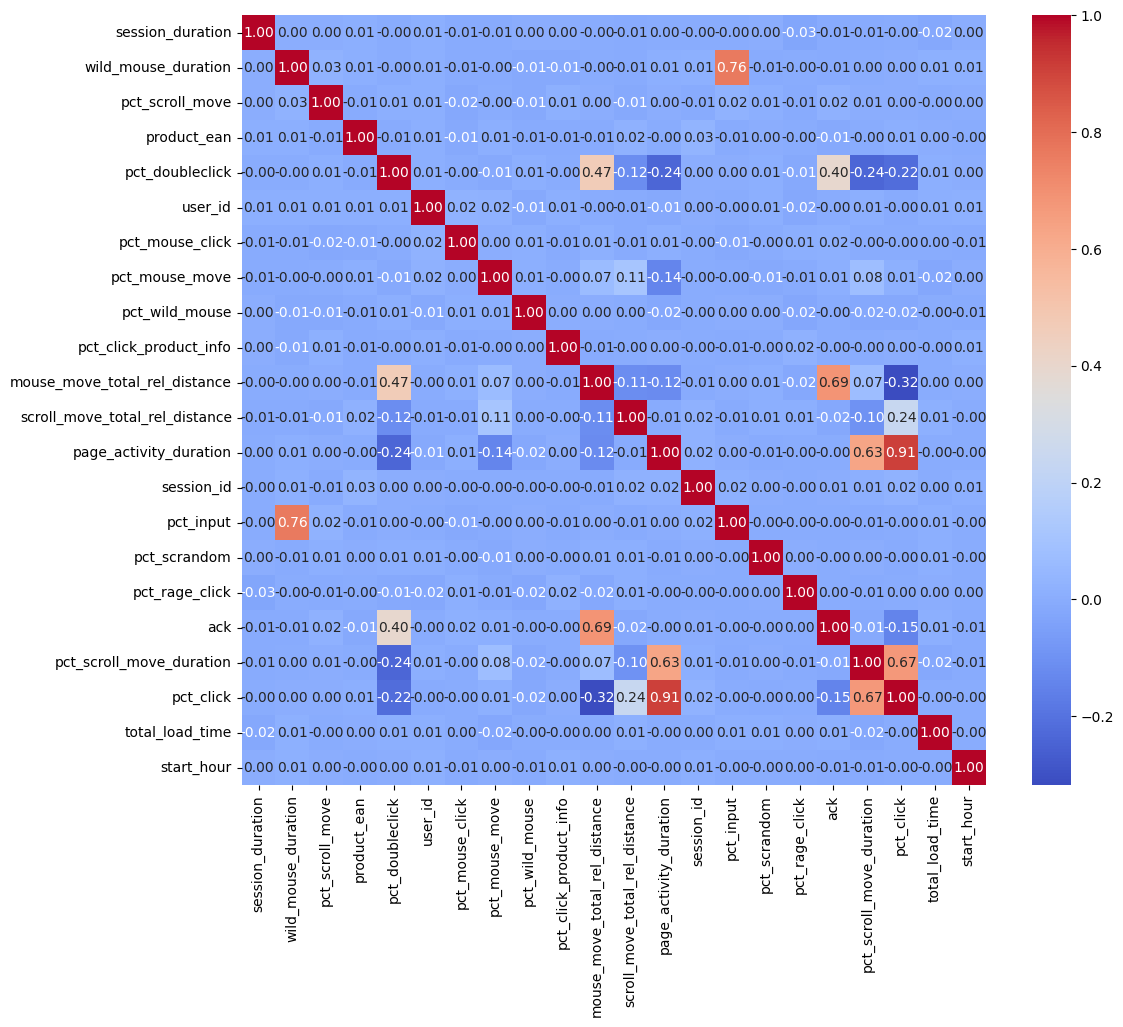

In [38]:
numeric_columns = sessions.select_dtypes(include='number')
correlation_matrix = numeric_columns.corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)
plt.show()

Niektoré atribúty majú nulovú koreláciu s inými atribútmi, takže nám veľa informácií neposkytnú:
1. user_id
2. pct_mouse_click
3. total_load_time
4. pct_rage_click
5. pct_scrandom
6. pct_input
7. session_id
8. pct_click_product_info
9. pct_wild_mouse

Zvyšné atribúty majú medzi sebou určitú koreláciu, takže nám môžu byť užitočné:
1. pct_click
2. pct_scroll_move_duration
3. ack
4. page_activity_duration
5. scroll_move_total_rel_distance
6. mouse_move_total_rel_distance
7. pct_mouse_move

Skúsme preskúmať ich vzájomnú závislosť.

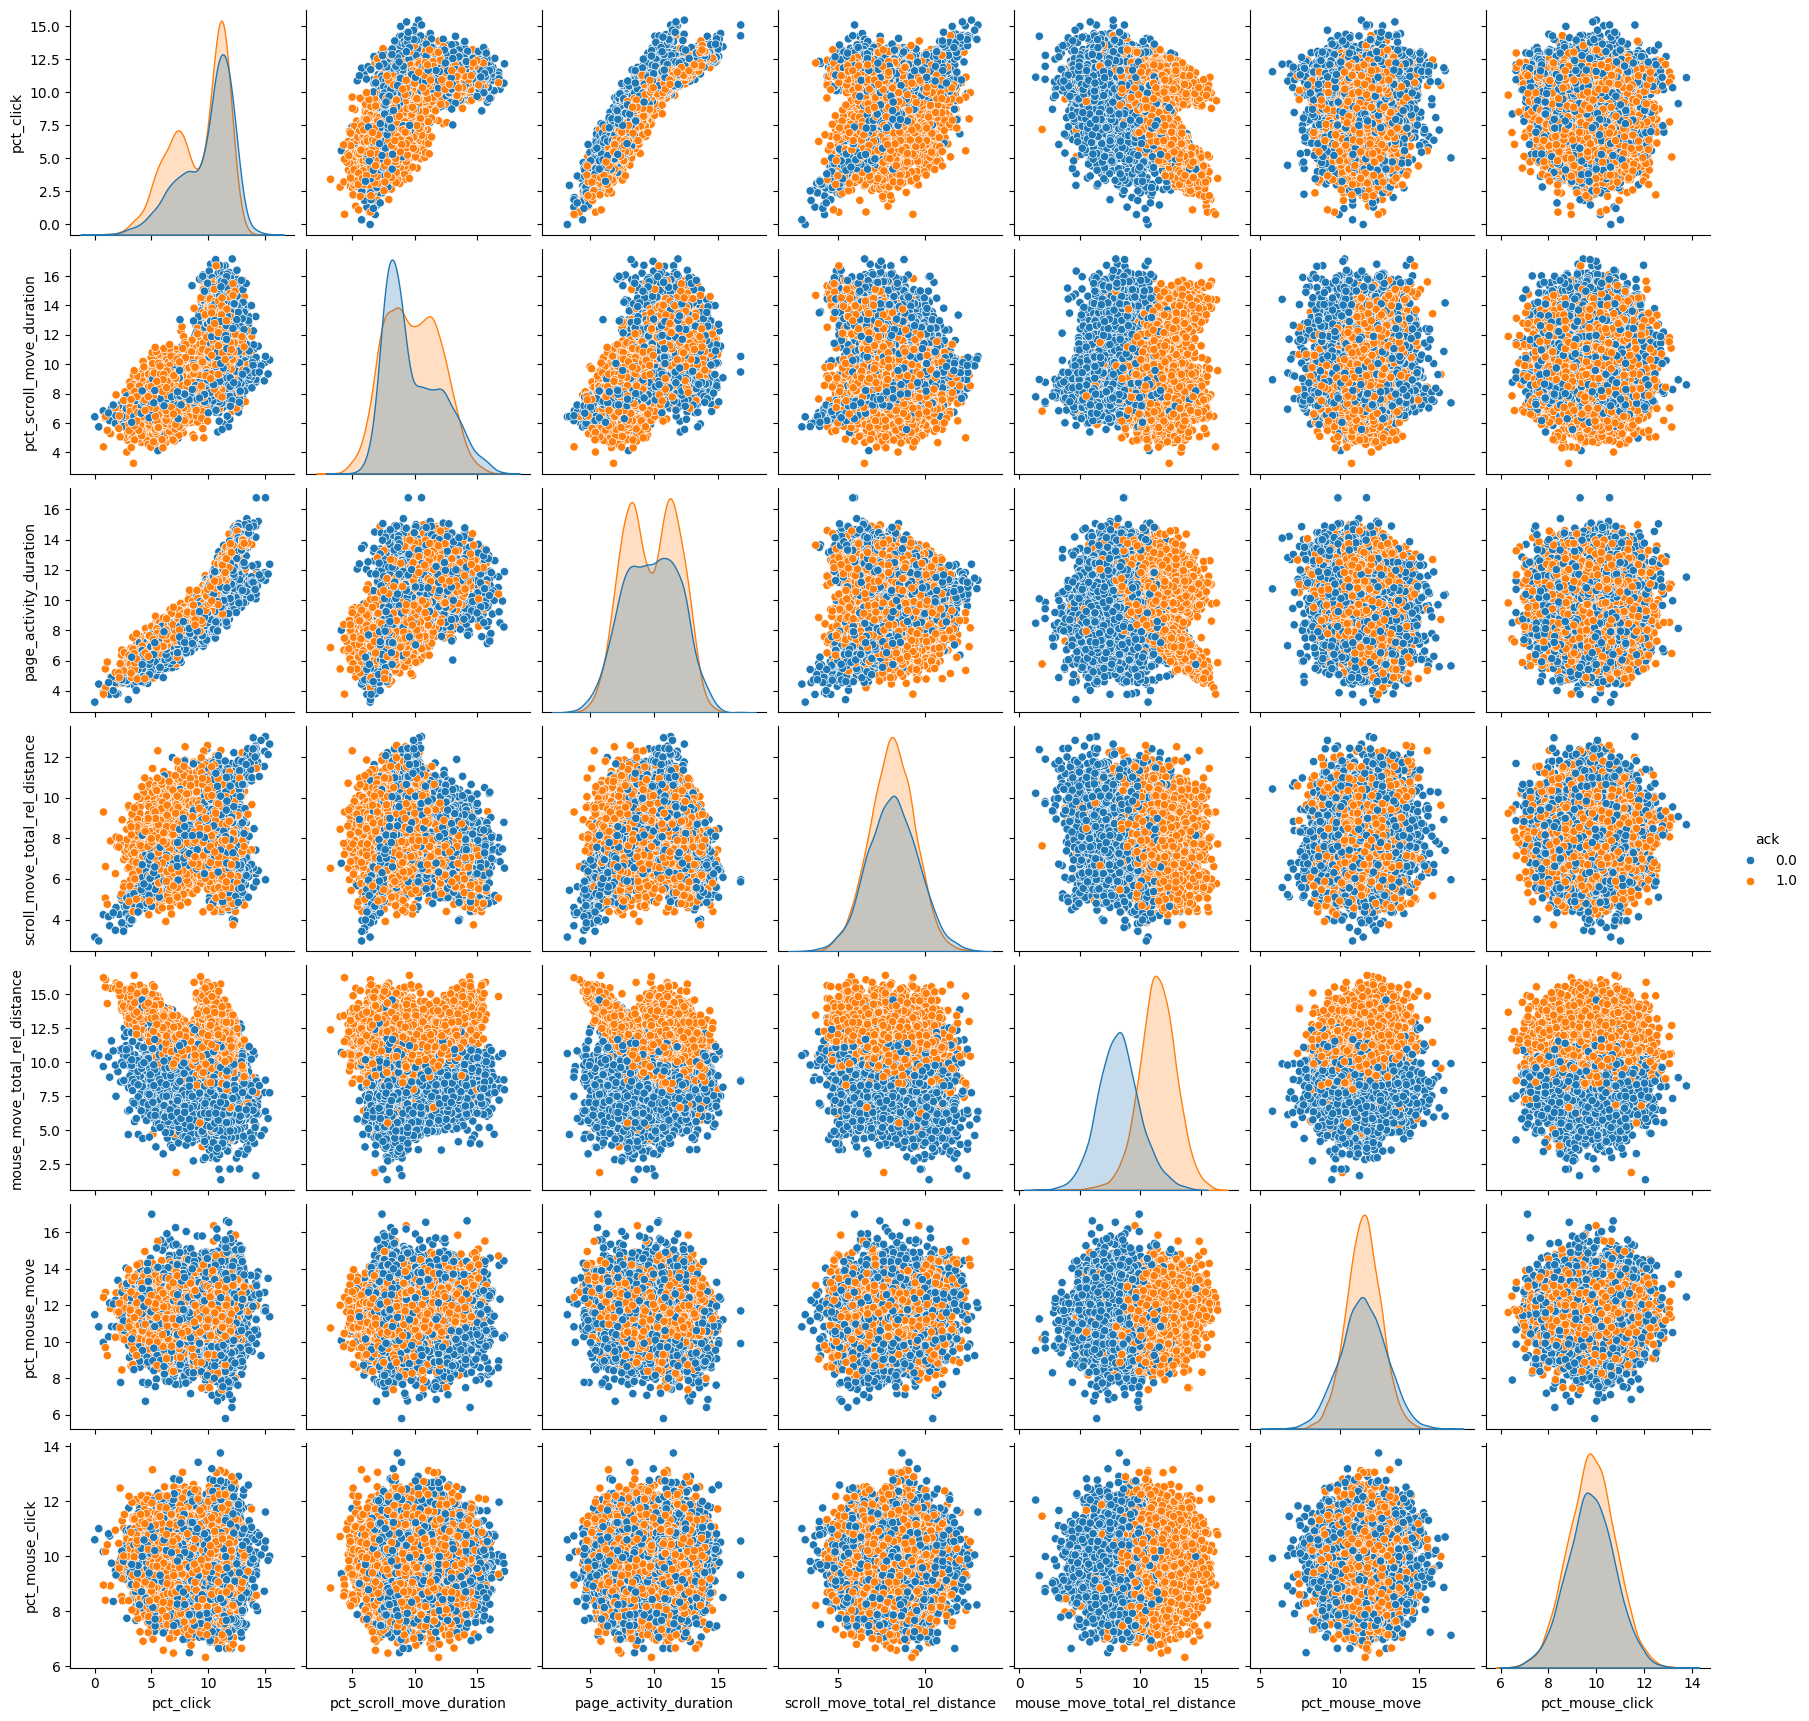

In [39]:
sns.pairplot(sessions, vars=['pct_click','pct_scroll_move_duration', 'page_activity_duration','scroll_move_total_rel_distance','mouse_move_total_rel_distance','pct_mouse_move','pct_mouse_click'], hue="ack", diag_kind="kde")

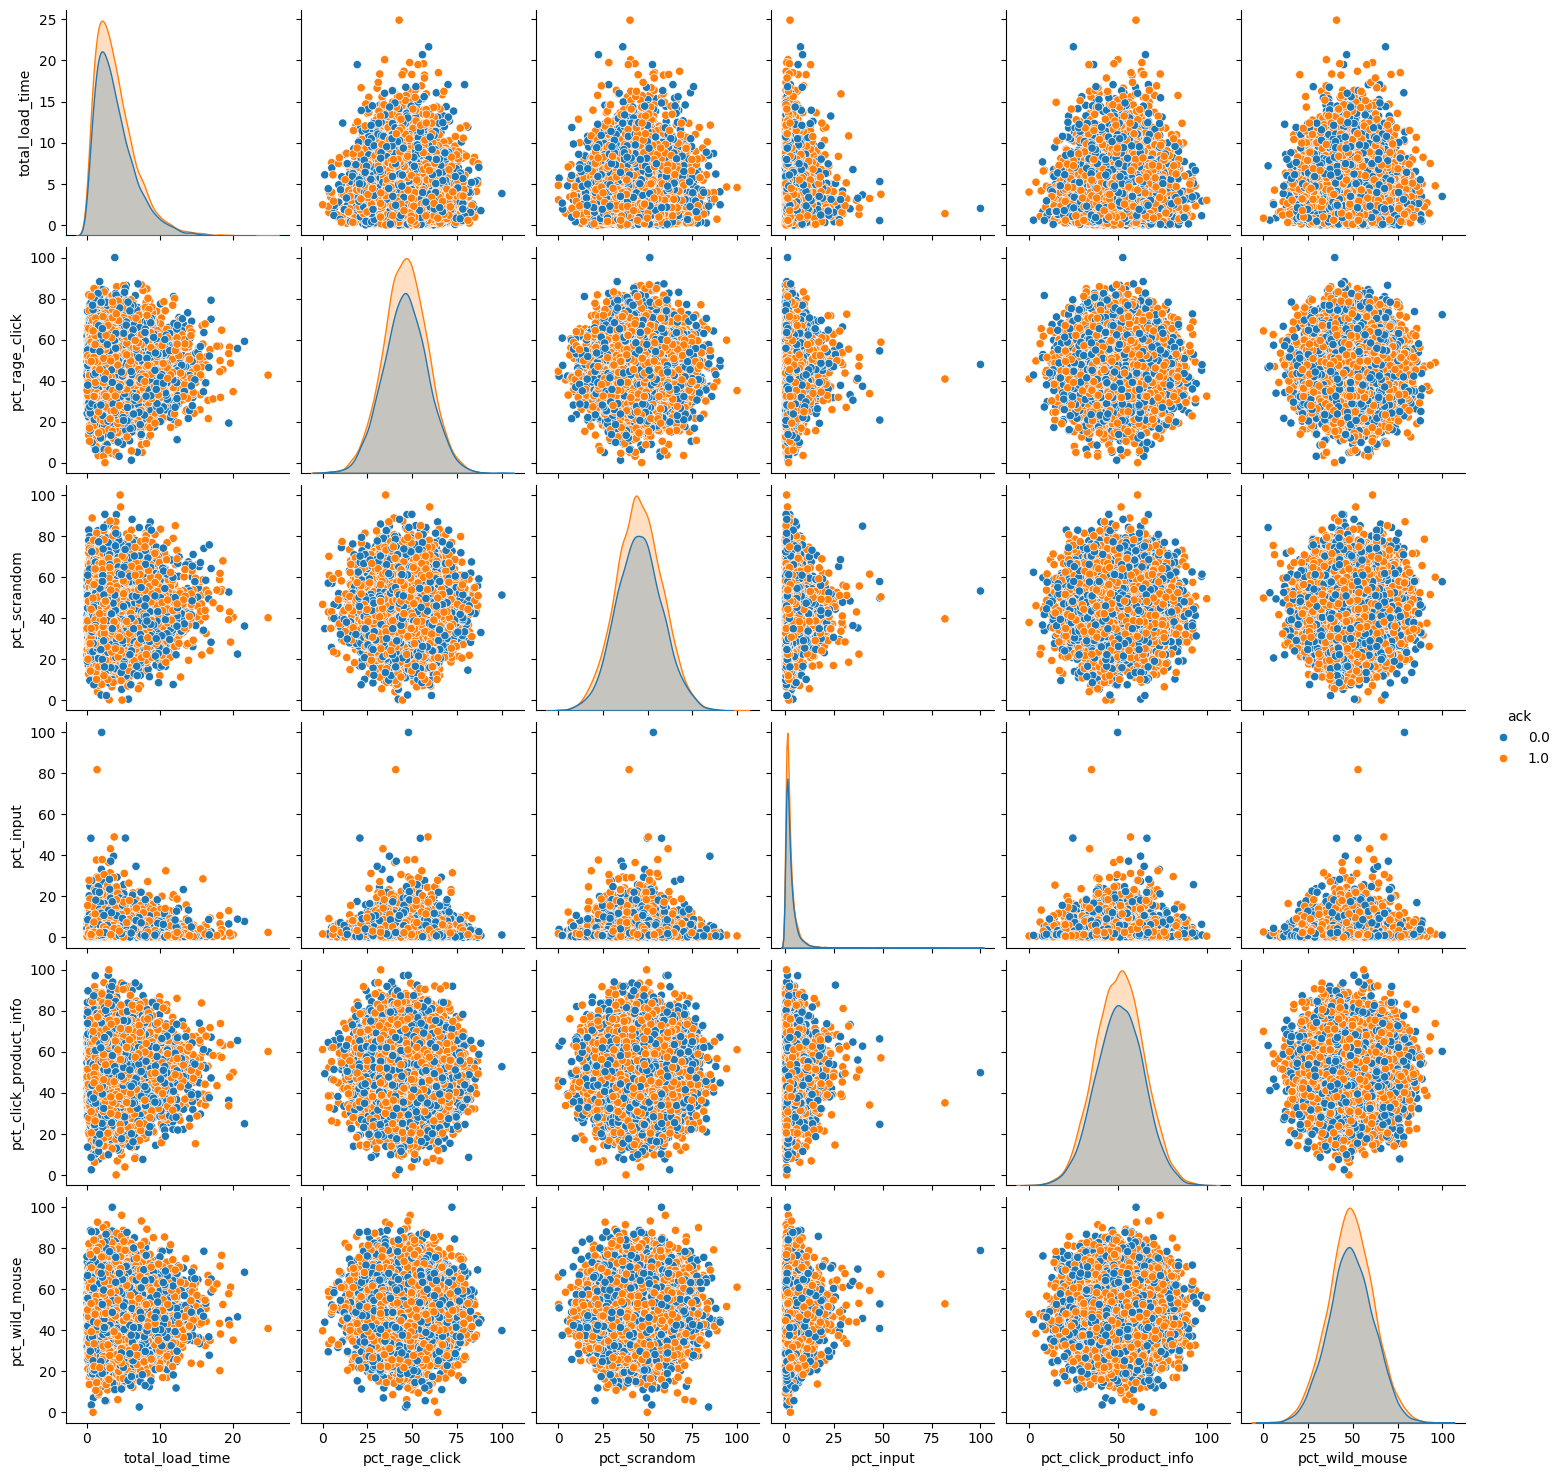

In [40]:
sns.pairplot(sessions, vars=['total_load_time','pct_rage_click','pct_scrandom','pct_input','pct_click_product_info', 'pct_wild_mouse'], hue="ack", diag_kind="kde")

Vytvorili sme tiež graf na preskúmanie negatívnej korelácie medzi pct_click a mouse_move_total_rel_distance.

<Axes: xlabel='pct_click', ylabel='mouse_move_total_rel_distance'>

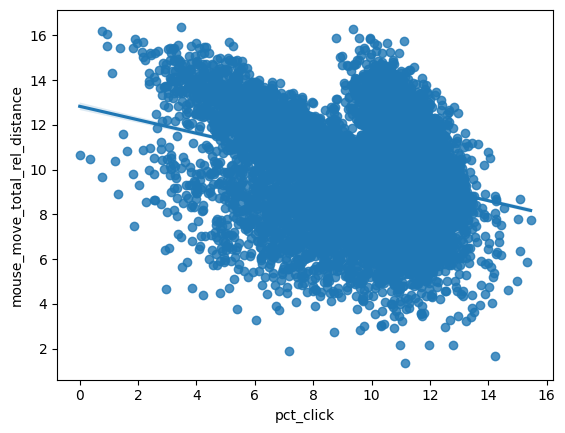

In [41]:
sns.regplot(x="pct_click",y="mouse_move_total_rel_distance",data=sessions)

In [42]:
sessions.pct_click.corr(sessions.mouse_move_total_rel_distance)

-0.3187666851172751

Potom sme tiež skúmali najväčšiu pozitívnu koreláciu medzi pct_click a page_activity_duration

<Axes: xlabel='pct_click', ylabel='page_activity_duration'>

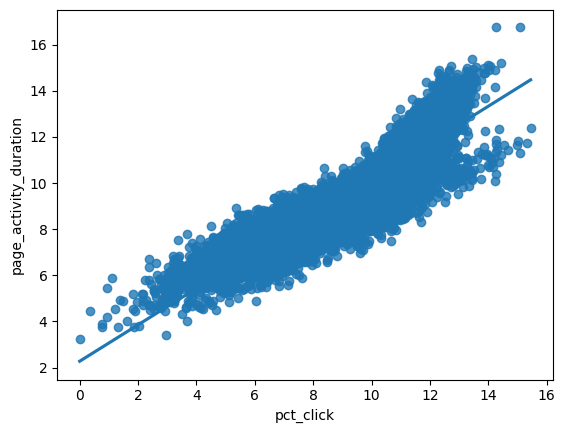

In [43]:
sns.regplot(x="pct_click",y="page_activity_duration",data=sessions)

In [44]:
sessions.pct_click.corr(sessions.page_activity_duration)

0.9093536257390898

Táto tabuľka ukazuje, v ktoré dni sa zaregistrovalo viac žien alebo mužov.

In [45]:
genders = pd.crosstab(index=users["sex"], columns=users['formatted_registration'])
genders.index=["M", "F"]
genders

formatted_registration  2013-09-28  2013-10-04  2013-10-06  2013-10-08  \
M                                1           0           0           0   
F                                0           1           1           1   

formatted_registration  2013-10-14  2013-10-16  2013-10-17  2013-10-24  \
M                                0           1           1           1   
F                                1           0           0           0   

formatted_registration  2013-10-25  2013-11-04  ...  2023-08-25  2023-08-28  \
M                                1           1  ...           0           1   
F                                0           0  ...           1           0   

formatted_registration  2023-08-31  2023-09-08  2023-09-11  2023-09-14  \
M                                0           1           0           0   
F                                1           2           1           1   

formatted_registration  2023-09-15  2023-09-16  2023-09-21  2023-09-22  
M                                2           1           1           1  
F                                2           0           0           0  

[2 rows x 1096 columns]

In [46]:
genders = pd.crosstab(index=users["sex"], columns=users['formatted_registration'])
genders.index=["M", "F"]
genders

formatted_registration  2013-09-28  2013-10-04  2013-10-06  2013-10-08  \
M                                1           0           0           0   
F                                0           1           1           1   

formatted_registration  2013-10-14  2013-10-16  2013-10-17  2013-10-24  \
M                                0           1           1           1   
F                                1           0           0           0   

formatted_registration  2013-10-25  2013-11-04  ...  2023-08-25  2023-08-28  \
M                                1           1  ...           0           1   
F                                0           0  ...           1           0   

formatted_registration  2023-08-31  2023-09-08  2023-09-11  2023-09-14  \
M                                0           1           0           0   
F                                1           2           1           1   

formatted_registration  2023-09-15  2023-09-16  2023-09-21  2023-09-22  
M                                2           1           1           1  
F                                2           0           0           0  

[2 rows x 1096 columns]

Tento graf ukazuje závislosť pct_click od rasy. Vidíme, že tento atribut je najväčší medzi zástupcami white skupiny a najmenší medzi zástupcami indian.

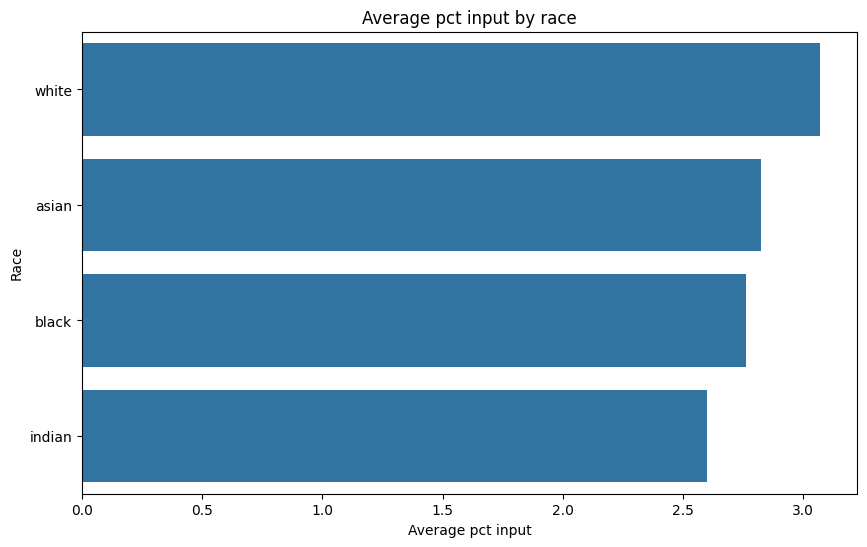

In [47]:
merged_data = sessions.merge(users[["user_id", "race"]], on="user_id", how="inner")
filtered_data_race = merged_data[merged_data["race"] != "Unknown"]
average_input_by_race = filtered_data_race.groupby("race")["pct_input"].mean().reset_index()
average_input_by_race = average_input_by_race.sort_values(by="pct_input", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x="pct_input", y="race", data=average_input_by_race, orient="h")

plt.xlabel("Average pct input")
plt.ylabel("Race")
plt.title("Average pct input by race")

plt.show()


# Formulácia a štatistické overenie hypotéz o dátach

# HYPOTÉZA: ack závisí od pct_click

In [48]:
purchased_clicks=sessions[sessions['ack']==1].pct_click
purchased_clicks=purchased_clicks.dropna()
not_purchased_clicks=sessions[sessions['ack']==0].pct_click
not_purchased_clicks=not_purchased_clicks.dropna()

In [49]:
sessions['ack'].value_counts()

ack
1.0    5982
0.0    4943
Name: count, dtype: int64

<Axes: xlabel='pct_click', ylabel='Count'>

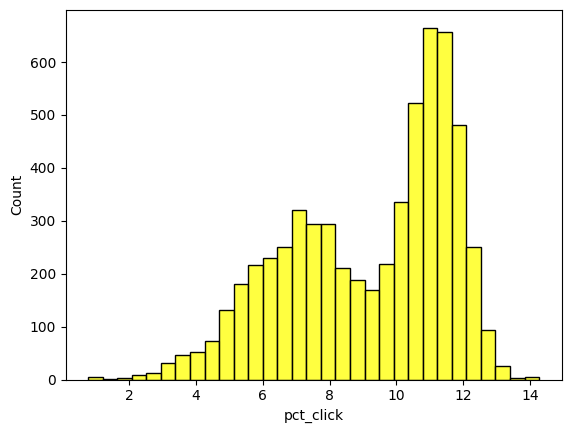

In [50]:
sns.histplot(purchased_clicks, color='yellow')

<Axes: xlabel='pct_click', ylabel='Count'>

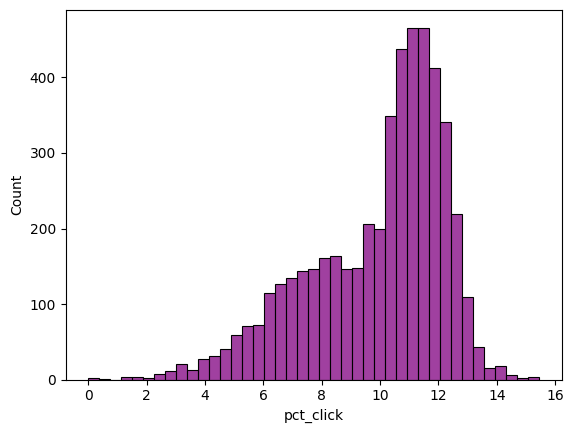

In [51]:
sns.histplot(not_purchased_clicks, color='purple')

Vidíme, že distribúcia pct_click na ack=1 je odlišná od distribúcii na ack=0.

In [52]:
purchased_clicks.describe()

count    5973.000000
mean        9.199498
std         2.443015
min         0.768090
25%         7.232750
50%         9.998180
75%        11.242730
max        14.278600
Name: pct_click, dtype: float64

In [53]:
not_purchased_clicks.describe()

count    4941.000000
mean        9.921917
std         2.327156
min         0.000000
25%         8.390570
50%        10.614640
75%        11.631220
max        15.448980
Name: pct_click, dtype: float64

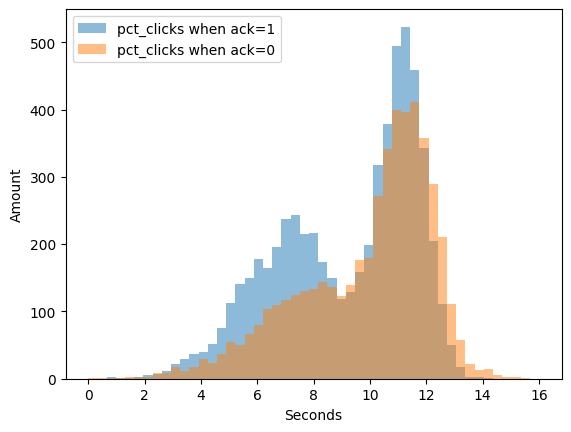

In [54]:
bins = np.linspace(0, 16, 50)
pyplot.hist(purchased_clicks, bins, alpha=0.5, label='pct_clicks when ack=1')
pyplot.hist(not_purchased_clicks, bins, alpha=0.5, label='pct_clicks when ack=0')
pyplot.xlabel('Seconds')
pyplot.ylabel('Amount')
pyplot.legend(loc='upper left')
pyplot.show()

Vyššie uvedený graf jasnejšie ukazuje rozdiel medzi týmito dvoma grafmi

In [55]:
purchased_clicks

0         5.00618
2         3.61231
6         5.12405
9         8.82545
11        9.33311
           ...   
11049    10.59453
11051    11.51694
11053    11.62547
11054    10.33692
11055    12.06632
Name: pct_click, Length: 5973, dtype: float64

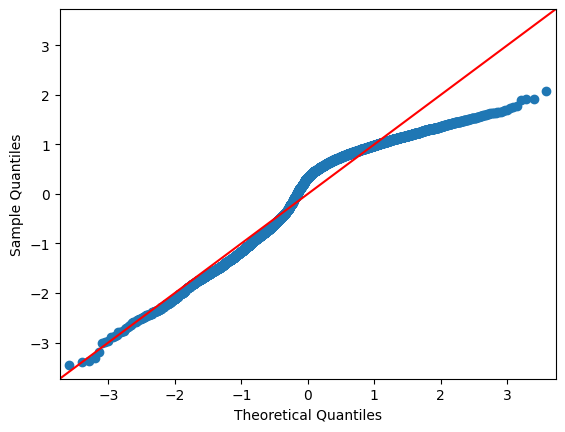

In [56]:
a = sm.ProbPlot(purchased_clicks,fit=True).qqplot(line='45')

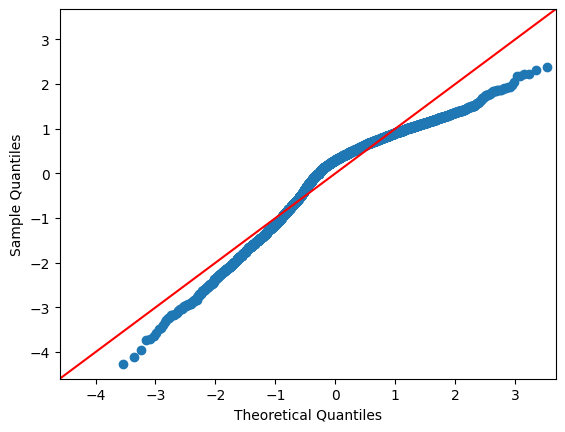

In [57]:
b = sm.ProbPlot(not_purchased_clicks,fit=True).qqplot(line='45')

Pomocou QQ plot môžeme vidieť, že naše údaje majú rovnaké rozdelenie, ale skontrolujeme normálne rozdelenie pomocou Shapirovho štatistického testu.

In [58]:
stats.shapiro(purchased_clicks)

C:\Users\patko\Desktop\iau\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9358336329460144, pvalue=5.605193857299268e-45)

In [59]:
stats.shapiro(not_purchased_clicks)

ShapiroResult(statistic=0.9325268864631653, pvalue=1.263971214820985e-42)

Ako vidíme, testovacia štatistika je menšia ako 1, čo naznačuje, že údaje sa odchyľujú od dokonalej normálnej distribúcie. 
Tiež p-hodnota je extrémne malá a odmietame nulovú hypotézu, takže údaje nie sú normálne rozdelené pre purchased_clicks a not_purchased_clicks.

Celkovo neboli splnené podmienky pre test T, takže budeme konať the Mann-Whitney U test.

In [60]:
stats.mannwhitneyu(purchased_clicks, not_purchased_clicks)

MannwhitneyuResult(statistic=12177508.5, pvalue=8.109605746748844e-56)

P-hodnota je extrémne malá, takže by sme mali zamietnuť nulovú hypotézu. Teda je medzi týmito dvoma skupinami výrazný rozdiel.

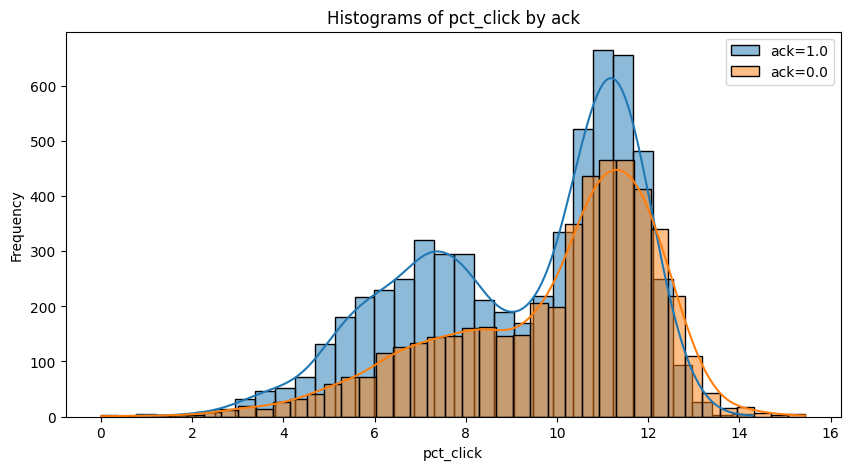

In [61]:
plt.figure(figsize=(10, 5))
for value in sessions['ack'].unique():
    subset = sessions[sessions['ack'] == value]
    sns.histplot(subset['pct_click'], kde=True, label=f'ack={value}')
plt.xlabel('pct_click')
plt.ylabel('Frequency')
plt.title('Histograms of pct_click by ack')
plt.legend()
plt.show()

In [62]:
sms.DescrStatsW(purchased_clicks).tconfint_mean()

(9.137530499124296, 9.261466062067736)

In [63]:
sms.DescrStatsW(not_purchased_clicks).tconfint_mean()

(9.85701319386197, 9.986821503567704)

Po vykonaní všetkých testov a vytvorení histogramu môžeme predpokladať, že ack môže nezávisieť od pct_click, pretože tiež musíme vziať do úvahy, že purchased_clicks je väčší približne na 1000 od not_purchased_clicks.

# HYPOTÉZA: ack závisí od pct_click_product_info

In [64]:
ack1 = sessions.loc[sessions.ack == 1, 'pct_click_product_info']
ack2 = sessions.loc[sessions.ack == 0, 'pct_click_product_info']
ack1 = ack1.dropna()
ack2 = ack2.dropna()

In [65]:
sessions['ack'].value_counts()

ack
1.0    5982
0.0    4943
Name: count, dtype: int64

<Axes: xlabel='pct_click_product_info', ylabel='Count'>

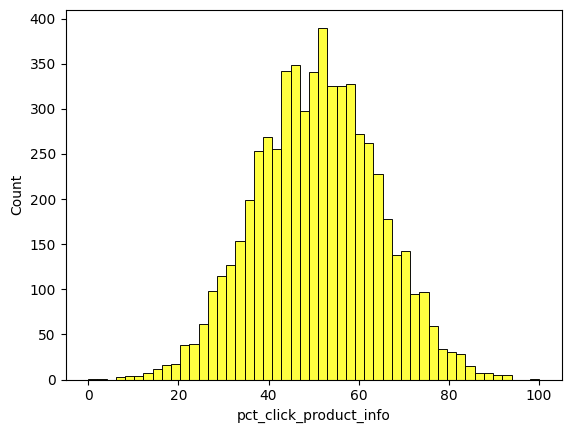

In [66]:
sns.histplot(ack1, color='yellow')

<Axes: xlabel='pct_click_product_info', ylabel='Count'>

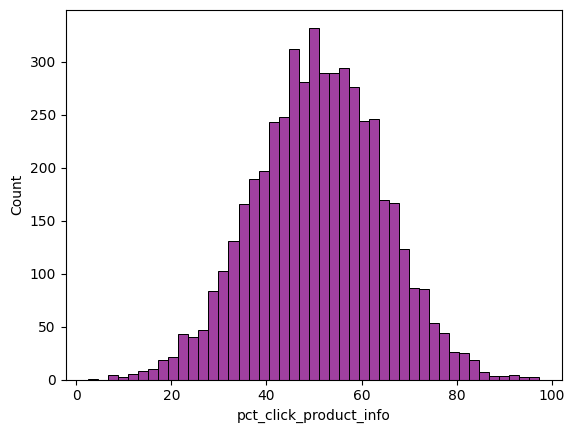

In [67]:
sns.histplot(ack2, color='purple')

Vidíme že distribúcie v grafoch sú trochu odlišné.

In [68]:
ack1.describe()

count    5975.000000
mean       50.776681
std        13.543111
min         0.000000
25%        41.389235
50%        50.929480
75%        59.917980
max       100.000000
Name: pct_click_product_info, dtype: float64

In [69]:
ack2.describe()

count    4939.000000
mean       50.888854
std        13.319936
min         2.498050
25%        41.874000
50%        50.884690
75%        60.148390
max        97.349440
Name: pct_click_product_info, dtype: float64

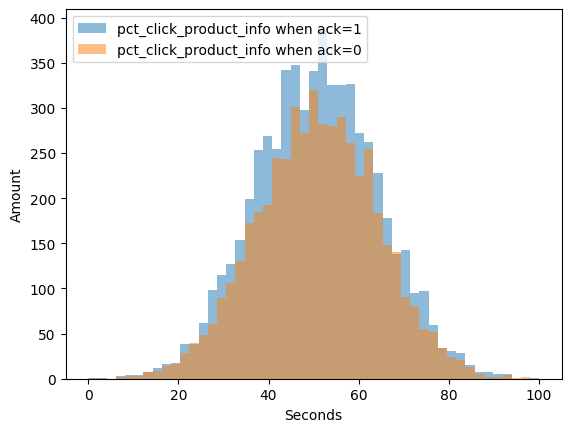

In [70]:
bins = np.linspace(0, 100, 50)
pyplot.hist(ack1, bins, alpha=0.5, label='pct_click_product_info when ack=1')
pyplot.hist(ack2, bins, alpha=0.5, label='pct_click_product_info when ack=0')
pyplot.xlabel('Seconds')
pyplot.ylabel('Amount')
pyplot.legend(loc='upper left')
pyplot.show()

Tento graf ukazuje rozdiel medzi predošlými grafmi

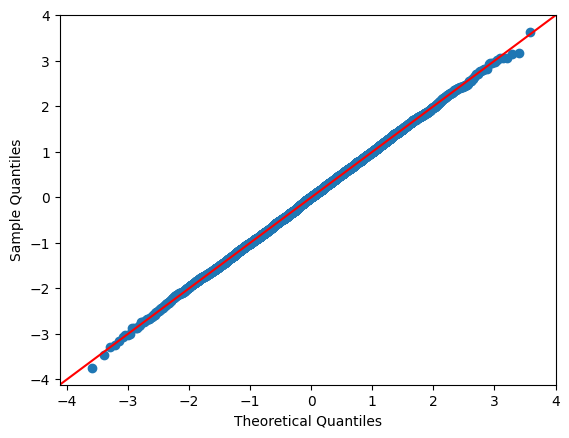

In [71]:
a = sm.ProbPlot(ack1,fit=True).qqplot(line='45')

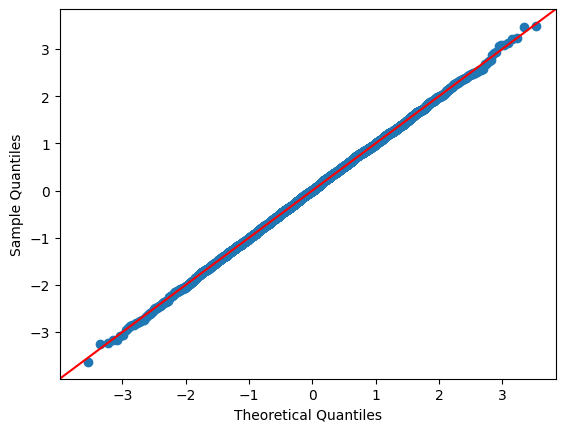

In [72]:
a = sm.ProbPlot(ack2,fit=True).qqplot(line='45')

QQ plot nám určuje, že oba dátové sety sú z rovnakého rozdelenia. Pomocou Shapirovho štatistického testu určíme, či pochádzajú z normálového rozdelenia.

In [73]:
stats.shapiro(ack1)

C:\Users\patko\Desktop\iau\lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9997862577438354, pvalue=0.8470922112464905)

In [74]:
stats.shapiro(ack2)

ShapiroResult(statistic=0.9997514486312866, pvalue=0.8567017912864685)

Keďže je p-hodnota oboch vzoriek väčšia ako 0.05, nulovú hypotézu nezamietame, teda oba sety dát sú približne z normálového rozdelenia. Na overenie rozdielu medzi dátami ešte použijeme manwhitneyov test.

In [75]:
stats.mannwhitneyu(ack1, ack2)

MannwhitneyuResult(statistic=14656846.0, pvalue=0.54804132754682)

P-hodnota z manwhitneyovho testu je pomerne vysoká, teda nulovú hypotézu nemôžme zamietnuť, a teda môžeme skonštatovať že medzi danými setmi dát nie je výrazný rozdiel.

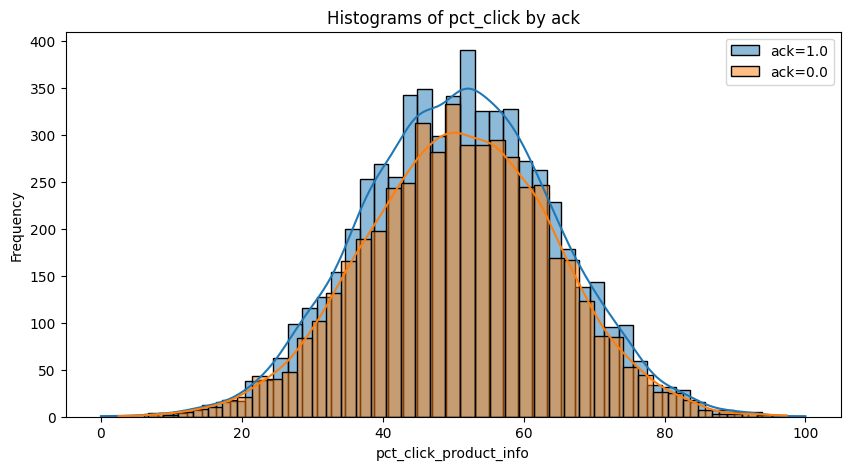

In [76]:
plt.figure(figsize=(10, 5))
for value in sessions['ack'].unique():
    subset = sessions[sessions['ack'] == value]
    sns.histplot(subset['pct_click_product_info'], kde=True, label=f'ack={value}')
plt.xlabel('pct_click_product_info')
plt.ylabel('Frequency')
plt.title('Histograms of pct_click by ack')
plt.legend()
plt.show()

Z grafu môžme vidieť, že hodnoty pri ack=1 siahajú vyššie, toto môže byť však ovplyvnené tím, že celkový počet sedení, kde je ack=1 je väčší.
Môžeme povedať, že rozkliknutie informácií o produkte zásadne neovplyvňuje hodnotu ack.

# Zaver:
* Na začiatok sme načítali a opísali všetky datasety a ich charakteristiky
* V datasete sa nachádzali dáta s nevhodným formátom, ktoré sme museli upravovať, alebo sme ich museli dávať do jednotného formátu.
* Našli sme pár chýb, ktoré sme nedokázali odstrániť, ako napríklad user_id v datasete users, kde sme predpokladali že každé user_id bude unikátne, ale našli sme viac záznamov s rovnakým id. S takýmito dátami by bolo problémové pracovať, preto sme sa im vyhýbali.
* Našli sme v datasete viacero atribútov s vysokou koreláciou, ale aj atribúty so zápornou koreláciou.
* Aj na základe tejto korelácie sme vyberali viacej dvojíc do párovej analýzy.
* Podarilo sa nám analyzovať údaje a vykonať štatistické testy podľa stanovených hypotéz. Na základe tejto analýzy a testov sme dospeli k určitým výsledkom a záverom.